[[-7.87157 -4.86573]
 [-4.76661 -6.87944]
 [-4.76661 -6.87944]
 ...
 [ 6.99423  1.00618]
 [ 8.28209  1.9426 ]
 [ 6.44367  0.35509]]


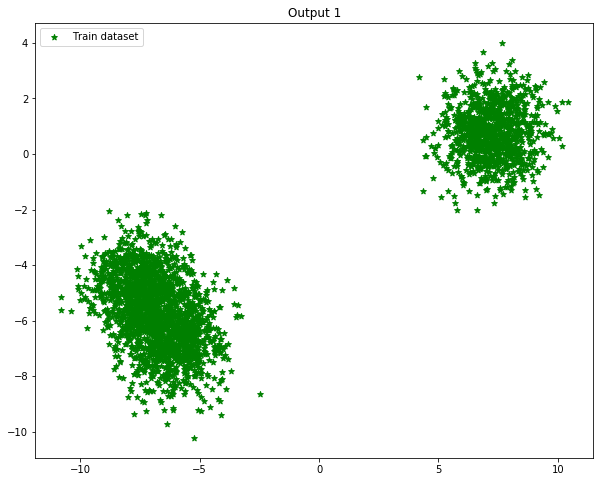

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1)

dataset = np.loadtxt('data_k_mean.txt')

x=dataset[:,0]
y=dataset[:,1]

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
plt.title("Output 1")
ax.scatter(x,y,marker='*',color='g',label='Train dataset')
ax.legend()

random.shuffle(dataset)

print(dataset)


In [98]:
def distance(a,b):
    x= np.sqrt(((a[1]-b[1])**2)+((a[0]-b[0])**2))
    return x

def initMean():
    number_of_rows = dataset.shape[0]
    random_indices = np.random.choice(number_of_rows, size=1, replace=False)
    random_rows = dataset[random_indices, :]
    x,y =random_rows[0][0],random_rows[0][1]
    return x,y


def mean(cluster):
    sumX=0
    sumY=0
    for i in cluster:
        sumX = sumX + dataset[i][0]
        sumY = sumY + dataset[i][1]
    n=len(cluster)
    if n<1:
        n=1
    meanX=sumX/n
    meanY=sumY/n
    return meanX,meanY

In [99]:
def cluster(means,k):
    newCluster=[]
    for i in range(k):
        x=[]
        newCluster.append(x)

    for point in range(len(dataset)):
        minDis=100000000000
        newc=-1
        for j in range(k):
            dis=distance(means[j],dataset[point])
            if(dis<minDis):
                minDis = dis
                newc = j
        newCluster[newc].append(point)
    return newCluster

In [100]:
def update(oldCluster,newCluster,k):
    for i in range(k):
        if(len(oldCluster[i])!=len(newCluster[i])):
            return 0
    for i in range(k):
        for j in range(len(oldCluster[i])):
            if(oldCluster[i][j]!=newCluster[i][j]):
                return 0
    return 1

In [101]:
def k_means(k):
    ar=[]

    for i in range(k):
        ar.append([i])
        
    flag =0
    while(True):
        means=[]
        
        for c in range(k):
            if flag==0:
                
                means.append(initMean()) 
                print(mean(ar[c]))
            else:
                means.append(mean(ar[c]))
        flag=1
        curr=cluster(means,k)
        u=update(ar,curr,k)
        if(u==1):
            break
            
        ar=curr.copy()
        
    return curr

Enter a value for K:3
(-7.87157, -4.86573)
(-4.76661, -6.87944)
(-4.76661, -6.87944)


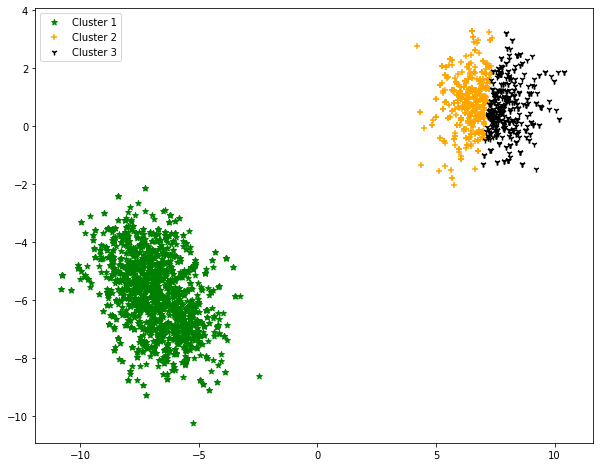

In [102]:
K=int(input('Enter a value for K:'))
output=k_means(K)


xPoint=[]
yPoint=[]
for i in range(K):
    x=[]
    y=[]
    xPoint.append(x)
    yPoint.append(y)
for i in range(K):
    for x in output[i]:
        xPoint[i].append(dataset[x][0])
        yPoint[i].append(dataset[x][1])

m=['*','+','1','s','v','p','+','D','X','P','2','H','3','d','4']
c=['green','orange','k','red','green','c','m','y','blue']

fig,ax=plt.subplots()
for i in range(K):
    ax.scatter(xPoint[i],yPoint[i],marker=m[i],color=c[i],label="Cluster "+str(i+1))
fig.set_figheight(8)
fig.set_figwidth(10)
ax.legend()
plt.show()

